# Plotting
In this notebook, we are going to plot and visualise our data. 

### Standard Python + R setup and imports

Work in this notebook so I can test viz in R as well.
Also imported fuzzy pandas.

In [14]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import fuzzy_pandas as fpd

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [16]:
%%R

# My commonly used R imports
require('tidyverse')

## Clean up

The 2022 window summer was in lowercase, im cleaning it up now before i get into deeper shit.

In [231]:
# This is the not the original df, I have overwritten it
df = pd.read_csv('year_wise.csv')
df.sample(5)
#remove the Unnamed: 0 column
df = df.drop('Unnamed: 0', axis=1)
df.sample(5)


,league_name,year,transfer_period,fee_cleaned
272,Ligue 1,2018,Summer,636.580
86,Championship,2016,Winter,83.042
301,Premier League,2002,Summer,281.760
306,Premier League,2004,Winter,92.440
325,Premier League,2014,Summer,1072.867


In [232]:

#replace transfer_period summer with Summer
df['transfer_period'] = df['transfer_period'].replace('summer', 'Summer')

In [233]:
#filter out years after 1999
df = df[df['year'] >= 2001]

In [241]:
#Add a column where league_name is the Premier League, the year is 2022, the transfer_period is Winter, and the fee_cleaned is 930.00
#df = df.append({'league_name': 'Premier League', 'year': 2022, 'transfer_period': 'Winter', 'fee_cleaned': 930.00}, ignore_index=True)
#Add another column where league_name is the La Liga, the year is 2022, the transfer_period is Winter, and the fee_cleaned is 25.00
#df = df.append({'league_name': 'Primera Division', 'year': 2022, 'transfer_period': 'Winter', 'fee_cleaned': 25.00}, ignore_index=True)
#Show me 2022 for Premier League and Primera Division
df[df['year'] == 2022]

,league_name,year,transfer_period,fee_cleaned
42,1 Bundesliga,2022,Summer,485.280
79,Championship,2022,Summer,87.695
122,Eredivisie,2022,Summer,169.485
165,Liga Nos,2022,Summer,178.790
208,Ligue 1,2022,Summer,560.550
251,Premier League,2022,Summer,2247.570
294,Premier Liga,2022,Summer,85.423
337,Primera Division,2022,Summer,506.690
380,Serie A,2022,Summer,749.730
381,Premier League,2022,Winter,930.000


In [249]:
#show me 2021 for Premier League and Primera Division
df[df['year'] == 2021]

,league_name,year,transfer_period,fee_cleaned
40,1 Bundesliga,2021,Summer,425.255
41,1 Bundesliga,2021,Winter,61.890
77,Championship,2021,Summer,60.360
78,Championship,2021,Winter,29.095
120,Eredivisie,2021,Summer,48.105
121,Eredivisie,2021,Winter,16.270
163,Liga Nos,2021,Summer,83.920
164,Liga Nos,2021,Winter,18.150
206,Ligue 1,2021,Summer,395.420
207,Ligue 1,2021,Winter,69.420


In [235]:

df.to_csv('year_wise.csv')

In [222]:
#unique league_names
df['league_name'].unique()

array(['1 Bundesliga', 'Championship', 'Eredivisie', 'Liga Nos',
       'Ligue 1', 'Premier League', 'Premier Liga', 'Primera Division',
       'Serie A'], dtype=object)

<AxesSubplot: xlabel='year'>

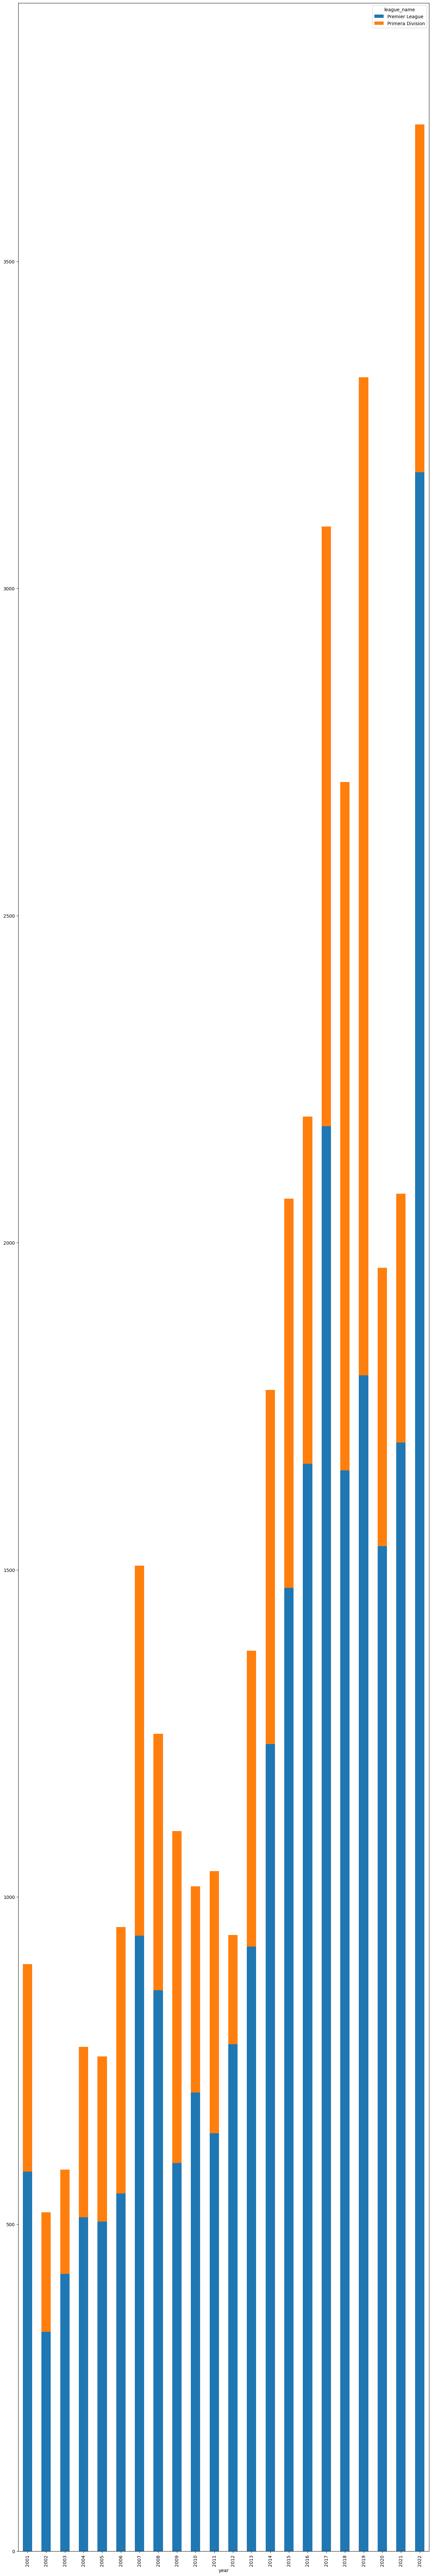

In [244]:
#show me the yearwise expenditure of the premier league and Primera Division
df[df['league_name'].isin(['Premier League', 'Primera Division'])].groupby(['year', 'league_name'])['fee_cleaned'].sum().unstack().plot(kind='bar', stacked=True)

In [236]:
%%R

df <- read_csv('year_wise.csv')





New names:
• `` -> `...1`
Rows: 383 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): league_name, transfer_period
dbl (3): ...1, year, fee_cleaned

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


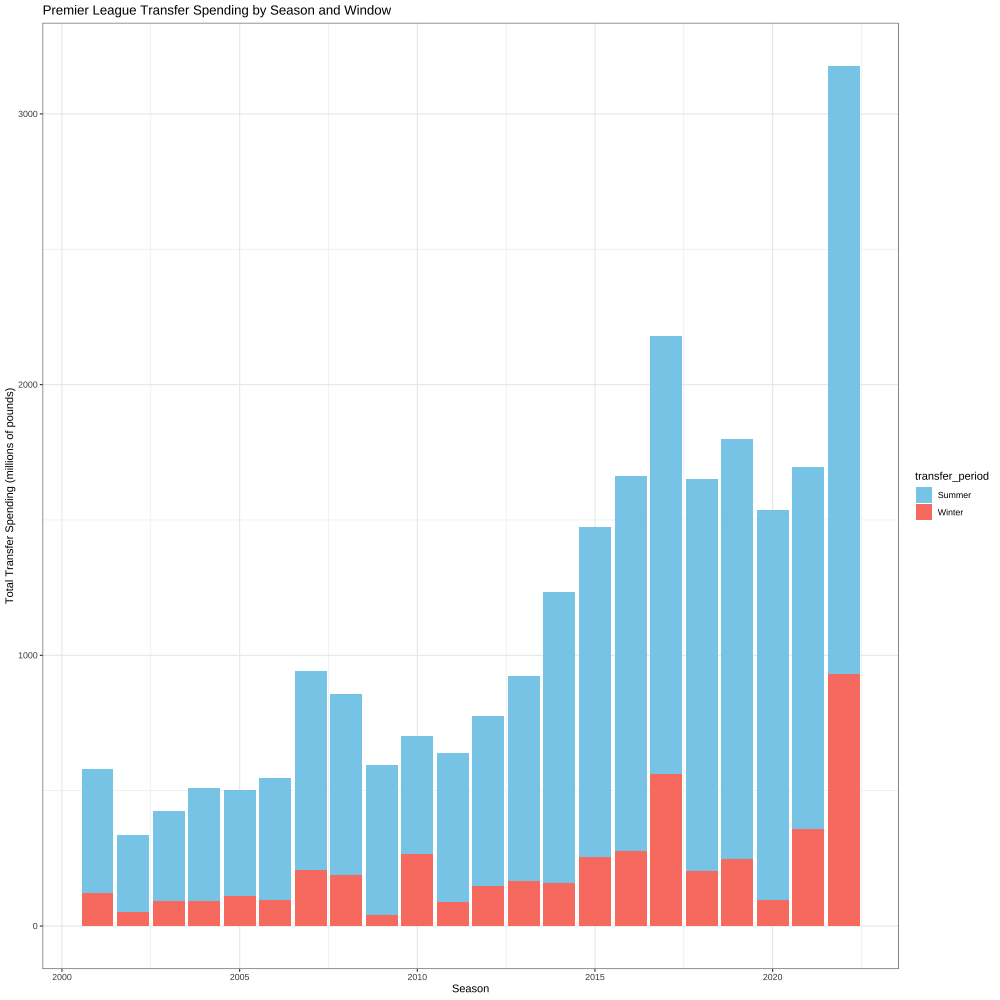

In [245]:
%%R -w 1000 -h 1000

df$fee_cleaned <- round(df$fee_cleaned, 2)

df_analyse <- df %>% 
  filter(league_name == "Premier League")

# aggregate the data by year and transfer window
df_sum <- df_analyse %>% 
  group_by(year, transfer_period) %>% 
  summarise(total_spent = sum(fee_cleaned)) %>% 
  ungroup()

# plot the data
ggplot(df_sum, aes(x = year, y = total_spent, fill = transfer_period)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Summer" = "skyblue", "Winter" = "salmon")) +
  labs(title = "Premier League Transfer Spending by Season and Window",
       x = "Season", y = "Total Transfer Spending (millions of pounds)") +
  theme_bw()



`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


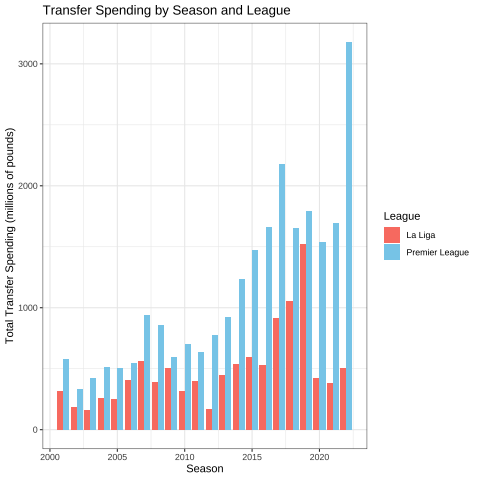

In [224]:
%%R

df_analyse <- df %>% 
  filter(league_name %in% c("Premier League", "Primera Division")) %>%
  mutate(league_name = ifelse(league_name == "Primera Division", "La Liga", league_name))

# aggregate the data by year and league name
df_sum <- df_analyse %>% 
  group_by(year, league_name) %>% 
  summarise(total_spent = sum(fee_cleaned)) %>% 
  ungroup()

# plot the data
ggplot(df_sum, aes(x = year, y = total_spent, fill = league_name)) +
  geom_col(position = "dodge") +
  scale_fill_manual(values = c("Premier League" = "skyblue", "La Liga" = "salmon")) +
  labs(title = "Transfer Spending by Season and League",
       x = "Season", y = "Total Transfer Spending (millions of pounds)", fill = "League") +
  theme_bw()



`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


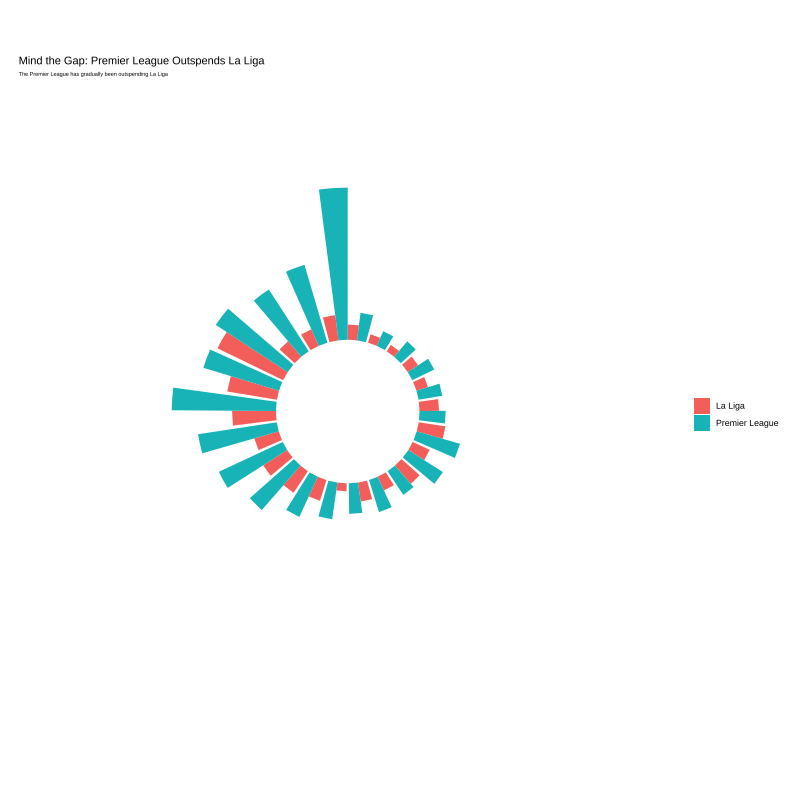

In [250]:
%%R -w 800 -h 800



df_analyse <- df %>% 
  filter(league_name %in% c("Premier League", "Primera Division")) %>%
  mutate(league_name = ifelse(league_name == "Primera Division", "La Liga", league_name))

# aggregate the data by year and league name
df_sum <- df_analyse %>% 
  group_by(year, league_name) %>% 
  summarise(total_spent = sum(fee_cleaned)) %>% 
  ungroup()

# create a new data frame for the labels
label_data <- df_sum %>%
  group_by(year) %>%
  summarise(fee_cleaned = max(total_spent))

# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data)
angle <-  90 - 360 * (as.numeric(factor(label_data$year))-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust<-ifelse(angle < -90, 1, 0)
 
# flip angle BY to make them readable
label_data$angle<-ifelse(angle < -90, angle+180, angle)

ggplot(df_sum, aes(x=year, y=total_spent, fill=league_name)) +       
  # This add the bars with a blue color
  geom_bar(stat="identity", position = "dodge") +
  
  # Limits of the plot = very important. The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
  ylim(-1500,4000) +
  
  # Custom the theme: no axis title and no cartesian grid
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm")
  ) +
  
  # This makes the coordinate polar instead of cartesian.
  coord_polar(start = 0) +
  
  # Add the labels, using the label_data dataframe that we have created before
  #geom_text(data=label_data, aes(x=year, y=(fee_cleaned-100)*ifelse(fee_cleaned>0,1,-1), label=fee_cleaned, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=4.5, angle= label_data$angle, inherit.aes = FALSE ) +
  
  # Adjust the size of the title and subtitle
  labs(title = "Mind the Gap: Premier League Outspends La Liga", subtitle = "The Premier League has gradually been outspending La Liga", x = NULL, y = NULL, fill = NULL) +
  theme(plot.title = element_text(size = rel(1)), plot.subtitle = element_text(size = rel(0.5)), plot.margin = unit(c(2, 0.5, 2, 0.5), "cm"))


In [ ]:
%%R
#Filter out all years after 199

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


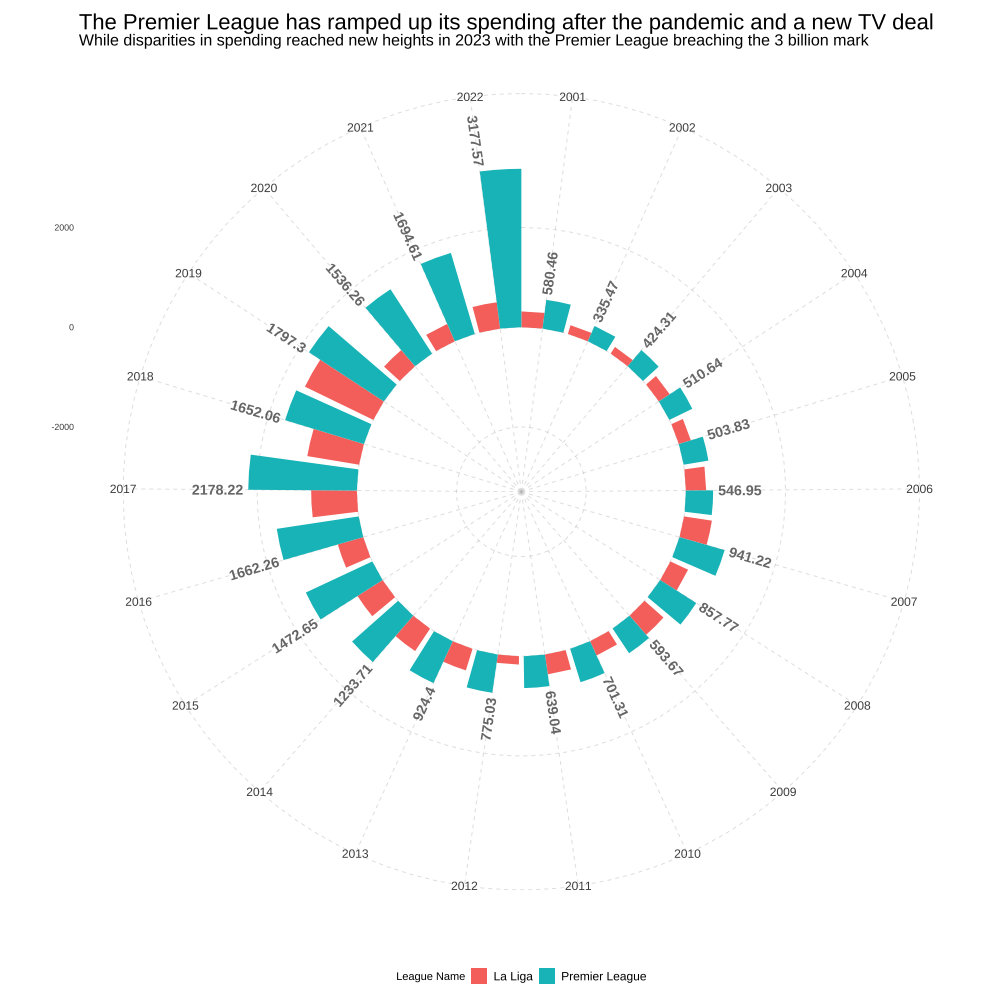

In [270]:

%%R -w 1000 -h 1000

df$fee_cleaned <- round(df$fee_cleaned, 2)

df_analyse <- df %>% 
  filter(league_name %in% c("Premier League", "Primera Division")) %>%
  mutate(league_name = ifelse(league_name == "Primera Division", "La Liga", league_name))

# aggregate the data by year and league name
df_sum <- df_analyse %>% 
  group_by(year, league_name) %>% 
  summarise(total_spent = sum(fee_cleaned)) %>% 
  ungroup()

# create a new data frame for the labels
label_data <- df_sum %>%
  group_by(year) %>%
  summarise(total_spent = max(total_spent))


# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data)
angle <-  90 - 360 * (as.numeric(factor(label_data$year))-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)

# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust <- ifelse(angle < -90, 1, 0)

# flip angle BY to make them readable
label_data$angle <- ifelse(angle < -90, angle+180, angle)

final_spiral<- ggplot(df_sum, aes(x=as.numeric(factor(year)), y=total_spent, fill=league_name)) +
  geom_bar(stat="identity", position = "dodge") +
  ylim(-3300, 3800) +
  theme_minimal() +
  scale_x_continuous(breaks = 1:length(unique(df_sum$year)), labels = sort(unique(df_sum$year))) +
  labs(x = "", y = "", fill = "League Name") +
  theme(
    axis.text.x = element_text(size = 12),
    axis.title = element_text(size = 14),
    panel.grid.major = element_line(colour = "grey", size = 0.2, linetype = "dashed"),
    panel.grid.minor = element_blank(),
    legend.position = "bottom",
    legend.box = "horizontal",
    legend.margin = margin(t = -0.3, b = 1),
    legend.text = element_text(size = 12),
    plot.margin = unit(c(0.5, 0.2, 0.5, 0.2), "cm")
  ) +
  coord_polar(start = 0) +
  geom_text(data=label_data, aes(x=as.numeric(factor(year)), y=total_spent + 100, label=total_spent, hjust=hjust), color="black", fontface="bold", alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE ) +
  labs(title = ggtitle("The Premier League has ramped up its spending after the pandemic and a new TV deal"), subtitle = "While disparities in spending reached new heights in 2023 with the Premier League breaching the 3 billion mark") +
  theme(plot.title = element_text(size = 22, margin = margin(b = 0.5)), plot.subtitle = element_text(size = 16, margin = margin(b = 0.5)))

final_spiral

In [282]:
%%R

ggsave("output.pdf", final_spiral, width = 14, height = 14)

In [283]:
%%R

ggsave("spiral.pdf", final_spiral, device="pdf")

Saving 6.67 x 6.67 in image


In [263]:
%%R -w 1000 -h 1000

df$fee_cleaned <- round(df$fee_cleaned, 2)

df_analyse <- df %>% 
  filter(league_name %in% c("Premier League", "Primera Division")) %>%
  mutate(league_name = ifelse(league_name == "Primera Division", "La Liga", league_name))

# aggregate the data by year and league name
df_sum <- df_analyse %>% 
  group_by(year, league_name) %>% 
  summarise(total_spent = sum(fee_cleaned)) %>% 
  ungroup()

# create a new data frame for the labels
label_data <- df_sum %>%
  group_by(year) %>%
  summarise(total_spent = max(total_spent))


# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data)
angle <-  90 - 360 * (as.numeric(factor(label_data$year))-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)

# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust <- ifelse(angle < -90, 1, 0)

# flip angle BY to make them readable
label_data$angle <- ifelse(angle < -90, angle+180, angle)

# calculate the difference in spending between the two leagues
df_diff <- df_analyse %>%
  group_by(year, league_name) %>%
  summarize(total_spent = sum(fee_cleaned)) %>%
  ungroup() %>%
  pivot_wider(names_from = league_name, values_from = total_spent) %>%
  mutate(diff = `Premier League` - `La Liga`)

# create a new data frame for the heatmap
heatmap_data <- df_diff %>%
  select(year, diff) %>%
  distinct() %>%
  arrange(desc(diff)) %>%
  mutate(color = scales::col_numeric(palette = "RdBu", domain = c(min(diff), max(diff)))) 

ggplot(df_sum, aes(x=as.numeric(factor(year)), y=total_spent, fill=league_name)) +
  geom_bar(stat="identity", position = "dodge") +
  ylim(-2800, 3800) +
  theme_minimal() +
  scale_x_continuous(breaks = 1:length(unique(df_sum$year)), labels = sort(unique(df_sum$year))) +
  labs(x = "Year", y = "Total Spent", fill = "League Name") +
  theme(
    axis.text.x = element_text(size = 12),
    axis.title = element_text(size = 14),
    panel.grid.major = element_line(colour = "grey", size = 0.2, linetype = "dashed"),
    panel.grid.minor = element_blank(),
    legend.position = "bottom",
    legend.box = "horizontal",
    legend.margin = margin(t = -0.3, b = 1),
    legend.text = element_text(size = 12),
    plot.margin = unit(c(0.5, 0.2, 0.5, 0.2), "cm")
  ) +
  coord_polar(start = 0) +
  geom_text(data=label_data, aes(x=as.numeric(factor(year)), y=total_spent + 100, label=total_spent, hjust=hjust), color="black", fontface="bold", alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE ) +
  geom_tile(data = heatmap_data, aes(x = as.numeric(factor(year)), y = 0.5, fill = color), height = 1, width = 0.5) +
  scale_fill_identity() +
  labs(title = ggtitle("The Premier League has ramped up its spending after the pandemic and a new TV deal"), subtitle = "Tebas can cry foul about doping, but disparities in expenditure have always been there.") +
  theme(plot.title = element_text(size = 22, margin = margin(b = 0.5)), plot.subtitle = element_text(size = 16, margin = margin(b = 0.5)))



`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
Error in `mutate()`:
! Problem while computing `color = scales::col_numeric(palette = "RdBu",
  domain = c(min(diff), max(diff)))`.
✖ `color` must be a vector, not a function.
Run `rlang::last_error()` to see where the error occurred.

Error in mutate(., color = scales::col_numeric(palette = "RdBu", domain = c(min(diff),  : 
  
✖ `color` must be a vector, not a function.


RInterpreterError: Failed to parse and evaluate line '\ndf$fee_cleaned <- round(df$fee_cleaned, 2)\n\ndf_analyse <- df %>% \n  filter(league_name %in% c("Premier League", "Primera Division")) %>%\n  mutate(league_name = ifelse(league_name == "Primera Division", "La Liga", league_name))\n\n# aggregate the data by year and league name\ndf_sum <- df_analyse %>% \n  group_by(year, league_name) %>% \n  summarise(total_spent = sum(fee_cleaned)) %>% \n  ungroup()\n\n# create a new data frame for the labels\nlabel_data <- df_sum %>%\n  group_by(year) %>%\n  summarise(total_spent = max(total_spent))\n\n\n# calculate the ANGLE of the labels\nnumber_of_bar <- nrow(label_data)\nangle <-  90 - 360 * (as.numeric(factor(label_data$year))-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)\n\n# calculate the alignment of labels: right or left\n# If I am on the left part of the plot, my labels have currently an angle < -90\nlabel_data$hjust <- ifelse(angle < -90, 1, 0)\n\n# flip angle BY to make them readable\nlabel_data$angle <- ifelse(angle < -90, angle+180, angle)\n\n# calculate the difference in spending between the two leagues\ndf_diff <- df_analyse %>%\n  group_by(year, league_name) %>%\n  summarize(total_spent = sum(fee_cleaned)) %>%\n  ungroup() %>%\n  pivot_wider(names_from = league_name, values_from = total_spent) %>%\n  mutate(diff = `Premier League` - `La Liga`)\n\n# create a new data frame for the heatmap\nheatmap_data <- df_diff %>%\n  select(year, diff) %>%\n  distinct() %>%\n  arrange(desc(diff)) %>%\n  mutate(color = scales::col_numeric(palette = "RdBu", domain = c(min(diff), max(diff)))) \n\nggplot(df_sum, aes(x=as.numeric(factor(year)), y=total_spent, fill=league_name)) +\n  geom_bar(stat="identity", position = "dodge") +\n  ylim(-2800, 3800) +\n  theme_minimal() +\n  scale_x_continuous(breaks = 1:length(unique(df_sum$year)), labels = sort(unique(df_sum$year))) +\n  labs(x = "Year", y = "Total Spent", fill = "League Name") +\n  theme(\n    axis.text.x = element_text(size = 12),\n    axis.title = element_text(size = 14),\n    panel.grid.major = element_line(colour = "grey", size = 0.2, linetype = "dashed"),\n    panel.grid.minor = element_blank(),\n    legend.position = "bottom",\n    legend.box = "horizontal",\n    legend.margin = margin(t = -0.3, b = 1),\n    legend.text = element_text(size = 12),\n    plot.margin = unit(c(0.5, 0.2, 0.5, 0.2), "cm")\n  ) +\n  coord_polar(start = 0) +\n  geom_text(data=label_data, aes(x=as.numeric(factor(year)), y=total_spent + 100, label=total_spent, hjust=hjust), color="black", fontface="bold", alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE ) +\n  geom_tile(data = heatmap_data, aes(x = as.numeric(factor(year)), y = 0.5, fill = color), height = 1, width = 0.5) +\n  scale_fill_identity() +\n  labs(title = ggtitle("The Premier League has ramped up its spending after the pandemic and a new TV deal"), subtitle = "Tebas can cry foul about doping, but disparities in expenditure have always been there.") +\n  theme(plot.title = element_text(size = 22, margin = margin(b = 0.5)), plot.subtitle = element_text(size = 16, margin = margin(b = 0.5)))\n\n'.
R error message: 'Error in mutate(., color = scales::col_numeric(palette = "RdBu", domain = c(min(diff),  : \n  \n✖ `color` must be a vector, not a function.'

In [179]:
%%R

install.packages("circlepackeR")
library(circlepackeR)

R[write to console]: Installing package into ‘/usr/local/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Error in library(circlepackeR) : 
  there is no package called ‘circlepackeR’

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: package ‘circlepackeR’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages 




Error in library(circlepackeR) : 
  there is no package called ‘circlepackeR’


RInterpreterError: Failed to parse and evaluate line '\ninstall.packages("circlepackeR")\nlibrary(circlepackeR)\n'.
R error message: 'Error in library(circlepackeR) : \n  there is no package called ‘circlepackeR’'

In [178]:
%%R

library(circlepackeR)

# create data frame with league names and expenditure
df <- data.frame(
  league_name = c("Premier League", "La Liga", "Serie A", "Ligue 1"),
  total_spent = c(930, 25, 30, 110)
)

# create a nested list for circlepackeR
circle_data <- list(
  name = "Leagues",
  children = lapply(1:nrow(df), function(i) {
    list(name = df$league_name[i], size = df$total_spent[i])
  })
)

# create the circle pack plot
circlepackeR(circle_data, color = "category10", legend = TRUE, labels = TRUE)


R[write to console]: Error in library(circlepackeR) : 
  there is no package called ‘circlepackeR’

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: package ‘circlepackeR’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages 




Error in library(circlepackeR) : 
  there is no package called ‘circlepackeR’


RInterpreterError: Failed to parse and evaluate line '\nlibrary(circlepackeR)\n\n# create data frame with league names and expenditure\ndf <- data.frame(\n  league_name = c("Premier League", "La Liga", "Serie A", "Ligue 1"),\n  total_spent = c(930, 25, 30, 110)\n)\n\n# create a nested list for circlepackeR\ncircle_data <- list(\n  name = "Leagues",\n  children = lapply(1:nrow(df), function(i) {\n    list(name = df$league_name[i], size = df$total_spent[i])\n  })\n)\n\n# create the circle pack plot\ncirclepackeR(circle_data, color = "category10", legend = TRUE, labels = TRUE)\n'.
R error message: 'Error in library(circlepackeR) : \n  there is no package called ‘circlepackeR’'

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


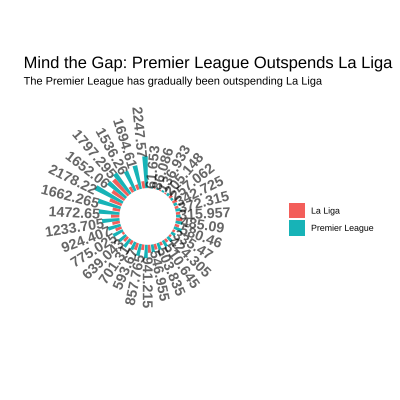

In [133]:
%%R -w 400 -h 400

df_analyse <- df %>% 
  filter(league_name %in% c("Premier League", "Primera Division")) %>%
  mutate(league_name = ifelse(league_name == "Primera Division", "La Liga", league_name))

# aggregate the data by year and league name
df_sum <- df_analyse %>% 
  group_by(year, league_name) %>% 
  summarise(total_spent = sum(fee_cleaned)) %>% 
  ungroup()

# create a new data frame for the labels
label_data <- df_sum %>%
  group_by(year) %>%
  summarise(fee_cleaned = max(total_spent))

# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data)
angle <-  90 - 360 * (as.numeric(factor(label_data$year))-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust<-ifelse(angle < -90, 1, 0)
 
# flip angle BY to make them readable
label_data$angle<-ifelse(angle < -90, angle+180, angle)

ggplot(df_sum, aes(x=year, y=total_spent, fill=league_name)) +       
  geom_bar(stat="identity", position = "dodge") +
  ylim(-2000,5000) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm")
  ) +
  coord_polar(start = 0) +
  geom_text(data=label_data, aes(x=year, y=(fee_cleaned-100)*ifelse(fee_cleaned>0,1,-1), label=fee_cleaned, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE ) +
  labs(title = "Mind the Gap: Premier League Outspends La Liga", subtitle = "The Premier League has gradually been outspending La Liga", x = NULL, y = NULL, fill = NULL) +
  theme(plot.title = element_text(size = rel(1.5)), plot.subtitle = element_text(size = rel(1)), plot.margin = unit(c(2, 0.5, 2, 0.5), "cm"))



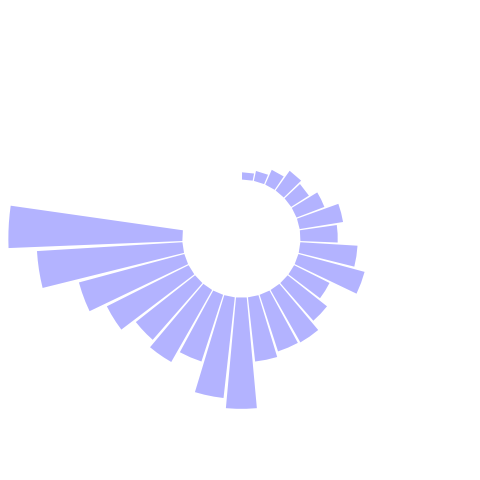

In [65]:
%%R
ggplot(df_, aes(x=Year, y=Amount)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  # This add the bars with a blue color
  geom_bar(stat="identity", fill=alpha("blue", 0.3)) +
  
  # Limits of the plot = very important. The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
  ylim(-500,1500) +
  
  # Custom the theme: no axis title and no cartesian grid
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-2,4), "cm")     # This remove unnecessary margin around plot
  ) +
  
  # This makes the coordinate polar instead of cartesian.
  coord_polar(start = 0)

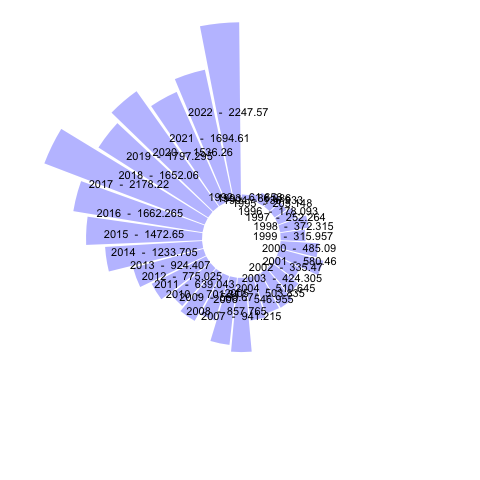

In [66]:
%%R

ggplot(df_premier, aes(x=Year, y=Amount)) +
  geom_bar(stat="identity", fill=alpha("blue", 0.3)) +
  ylim(-500,2500) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-2,4), "cm")
  ) +
  coord_polar(start = 0) +
  # Add labels for each year and amount
  geom_text(aes(label = paste(Year, " - ", Amount)), position = position_stack(vjust = 0.5))

Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'Year' not found
Run `rlang::last_error()` to see where the error occurred.


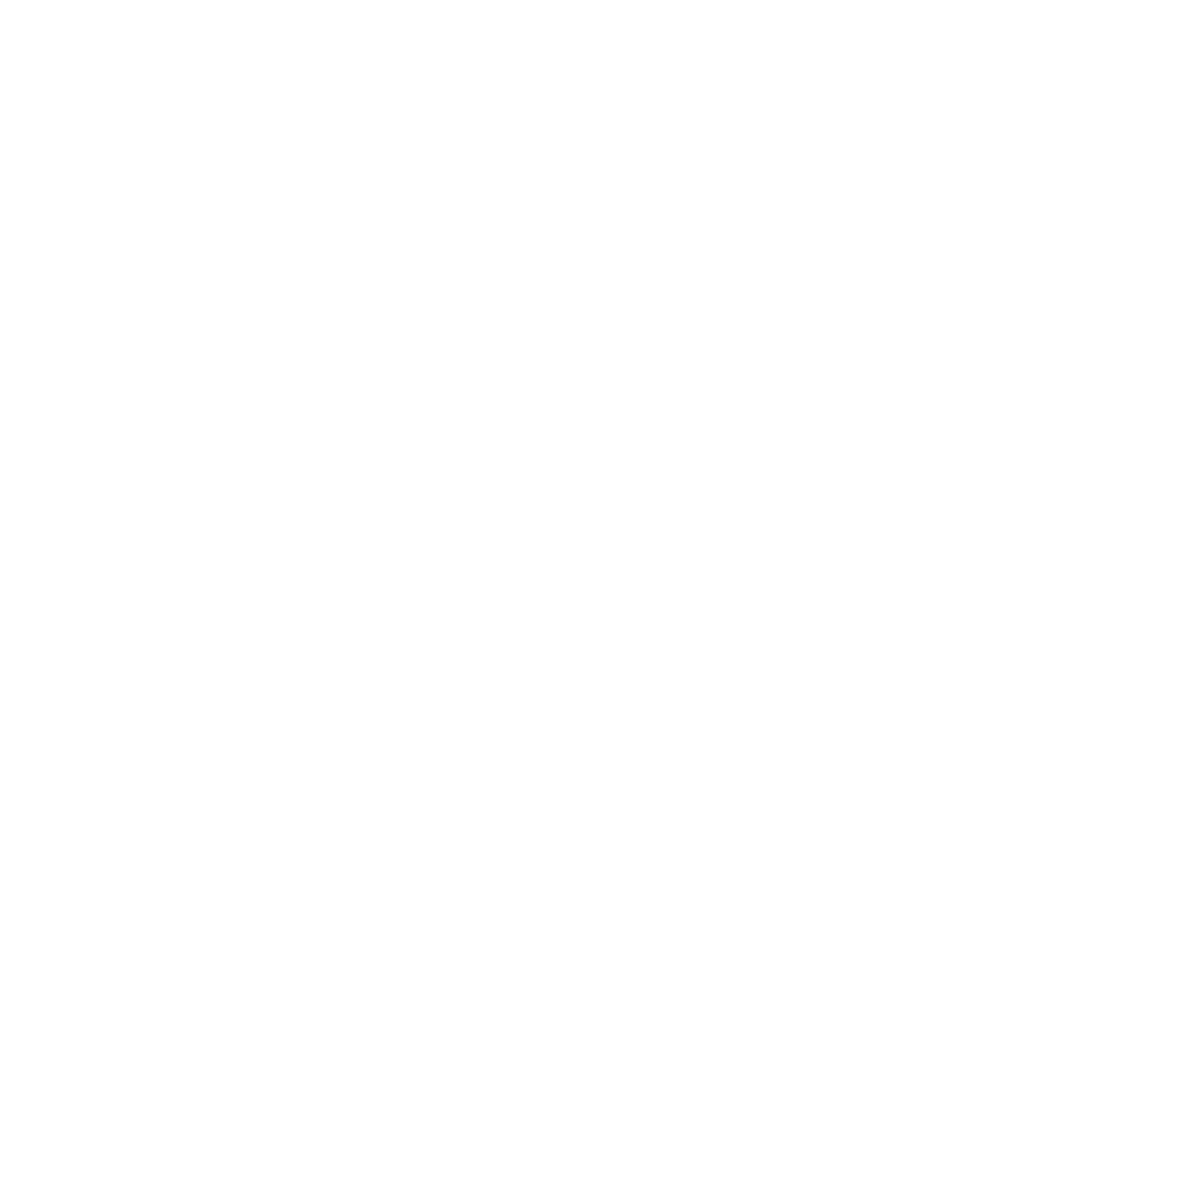

RRuntimeError: Error in geom_bar(stat = "identity", fill = alpha("skyblue", 0.7)) : 
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'Year' not found


In [88]:
%%R -w 1200 -h 1200

label_data <- df_premier_2000
 
# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data)
angle <-  90 - 360 * (as.numeric(factor(label_data$Year))-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust<-ifelse(angle < -90, 1, 0)
 
# flip angle BY to make them readable
label_data$angle<-ifelse(angle < -90, angle+180, angle)

ggplot(df_analyse, aes(x=year, y=Amount)) +       # Note that Year is a factor. If x is numeric, there is some space between the first bar
  
  # This add the bars with a blue color
  geom_bar(stat="identity", fill=alpha("skyblue", 0.7)) +
  
  # Limits of the plot = very important. The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
  ylim(-1000,2500) +
  
  # Custom the theme: no axis title and no cartesian grid
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm")      # Adjust the margin to make in sort labels are not truncated!
  ) +
  
  # This makes the coordinate polar instead of cartesian.
  coord_polar(start = 0) +
  
  # Add the labels, using the label_data dataframe that we have created before
  geom_text(data=label_data, aes(x=year, y=Amount-400, label=paste(year, " - ", Amount), hjust=hjust), color="black", fontface="bold",alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE ) +
 
  
  # Adjust the size of the title and subtitle
  labs(title = "Mind the Gap: Premier League Outspends La Liga", subtitle = "The Premier League has gradually been outspending La Liga") +
  theme(plot.title = element_text(size = rel(2)), plot.subtitle = element_text(size = rel(1.5)), plot.margin = unit(c(2, 0.5, 2, 0.5), "cm"))

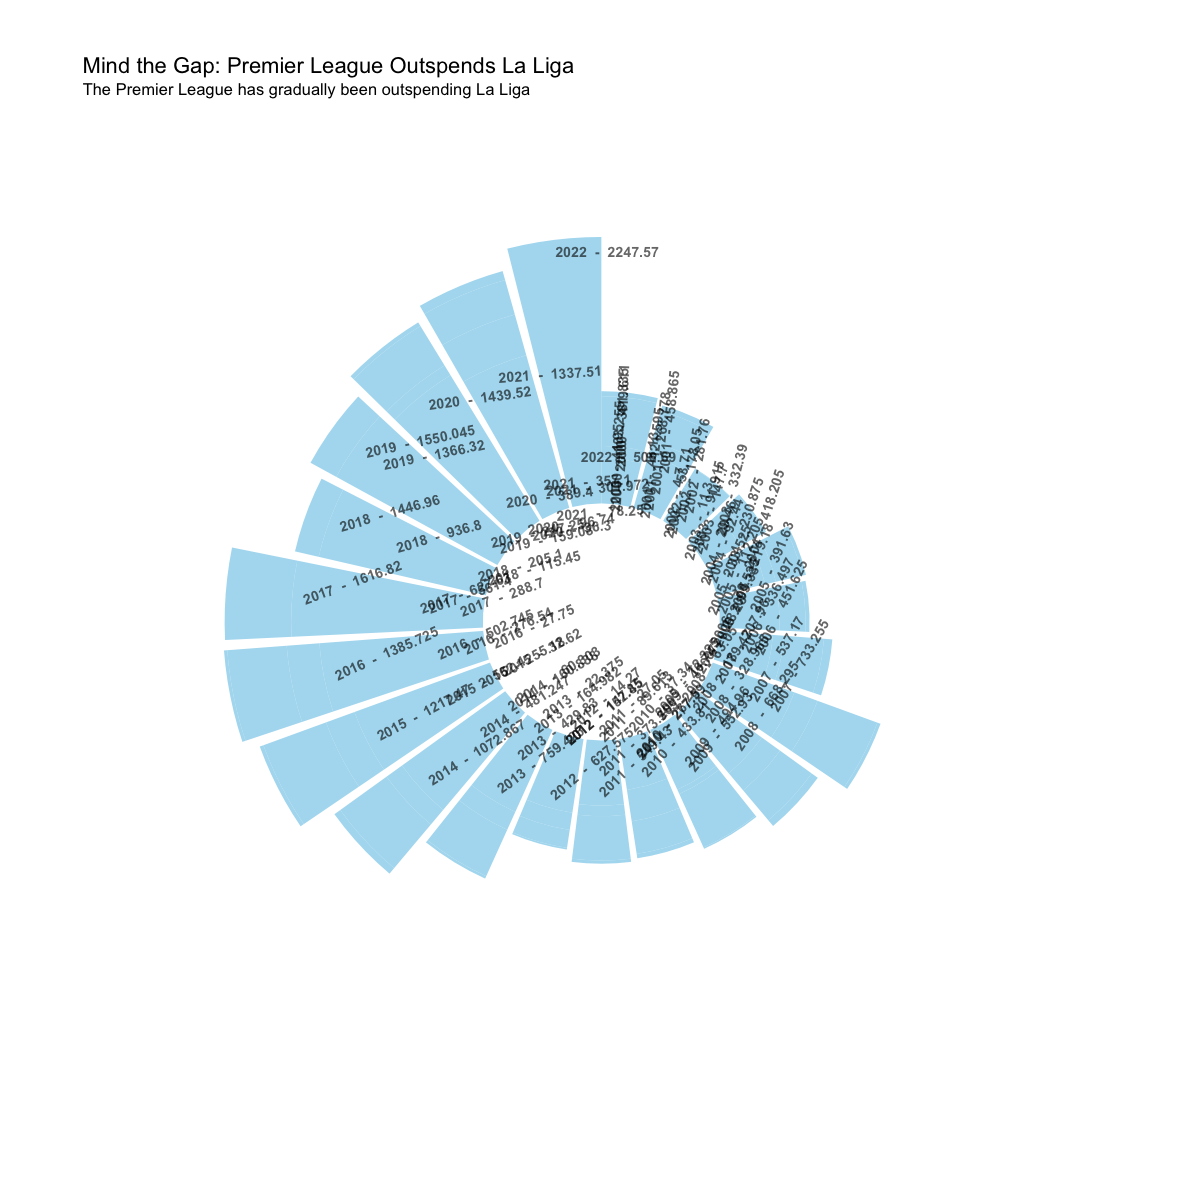

In [107]:
%%R -w 1200 -h 1200

label_data <- df_analyse
 
# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data)
angle <-  90 - 360 * (as.numeric(factor(label_data$year))-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust<-ifelse(angle < -90, 1, 0)
 
# flip angle BY to make them readable
label_data$angle<-ifelse(angle < -90, angle+180, angle)

ggplot(df_analyse, aes(x=year, y=fee_cleaned)) +       # Note that Year is a factor. If x is numeric, there is some space between the first bar
  
  # This add the bars with a blue color
  geom_bar(stat="identity", fill=alpha("skyblue", 0.7)) +
  
  # Limits of the plot = very important. The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
  ylim(-1000,2500) +
  
  # Custom the theme: no axis title and no cartesian grid
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm")      # Adjust the margin to make in sort labels are not truncated!
  ) +
  
  # This makes the coordinate polar instead of cartesian.
  coord_polar(start = 0) +
  
  # Add the labels, using the label_data dataframe that we have created before
  geom_text(data=label_data, aes(x=year, y=(fee_cleaned-100)*ifelse(fee_cleaned>0,1,-1), label=paste(year, " - ", fee_cleaned), hjust=hjust), color="black", fontface="bold",alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE ) +
  
  # Adjust the size of the title and subtitle
  labs(title = "Mind the Gap: Premier League Outspends La Liga", subtitle = "The Premier League has gradually been outspending La Liga") +
  theme(plot.title = element_text(size = rel(2)), plot.subtitle = element_text(size = rel(1.5)), plot.margin = unit(c(2, 0.5, 2, 0.5), "cm"))
